<a href="https://colab.research.google.com/github/Shekar13/Palmer-Archipelago-penguin-data/blob/main/EmployeeSalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
df = pd.read_csv("employee.csv")
print("Dataset Loaded Successfully")
df.head()


Dataset Loaded Successfully


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,03:05.6,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,03:05.6,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,03:05.6,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,03:05.6,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,03:05.6,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False


In [3]:
df.tail()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99995,99996,Finance,Male,27,Technician,03:05.6,1,Bachelor,4,4900,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,03:05.6,6,Master,5,8250,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,03:05.6,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,03:05.6,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,False
99999,100000,Finance,Female,43,Analyst,03:05.6,0,PhD,1,4400,51,43,27,11,75,13,45,1,2.64,False


In [4]:
df.head(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,03:05.6,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,03:05.6,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,03:05.6,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False


In [5]:
df.tail(4)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99996,99997,IT,Female,36,Consultant,03:05.6,6,Master,5,8250,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,03:05.6,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,03:05.6,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,False
99999,100000,Finance,Female,43,Analyst,03:05.6,0,PhD,1,4400,51,43,27,11,75,13,45,1,2.64,False


In [6]:
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,03:05.6,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,03:05.6,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,03:05.6,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,03:05.6,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,03:05.6,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,03:05.6,1,Bachelor,4,4900,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,03:05.6,6,Master,5,8250,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,03:05.6,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,03:05.6,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,False


In [7]:
# Basic dataset information
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  int64  
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [8]:
# Fill or drop missing values if necessary
df.dropna(inplace=True)

In [9]:
# Encoding categorical features if any (like department, education)
df = pd.get_dummies(df, drop_first=True)

# Optional: Normalize/scale features if you want (not necessary for Random Forest)


In [10]:
print(df.columns)


Index(['Employee_ID', 'Age', 'Years_At_Company', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned', 'Department_Engineering', 'Department_Finance',
       'Department_HR', 'Department_IT', 'Department_Legal',
       'Department_Marketing', 'Department_Operations', 'Department_Sales',
       'Gender_Male', 'Gender_Other', 'Job_Title_Consultant',
       'Job_Title_Developer', 'Job_Title_Engineer', 'Job_Title_Manager',
       'Job_Title_Specialist', 'Job_Title_Technician',
       'Education_Level_High School', 'Education_Level_Master',
       'Education_Level_PhD'],
      dtype='object')


In [11]:
X = df.drop('Monthly_Salary', axis=1)
y = df['Monthly_Salary']


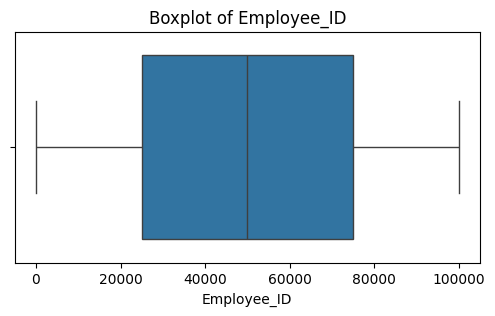

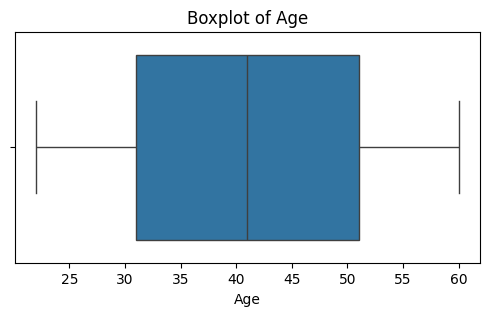

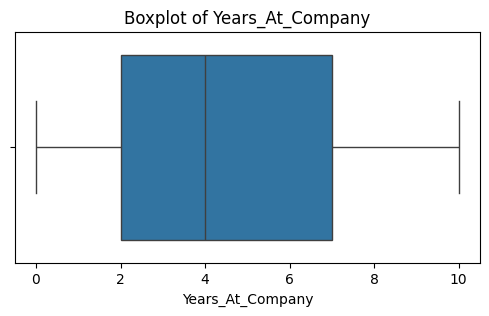

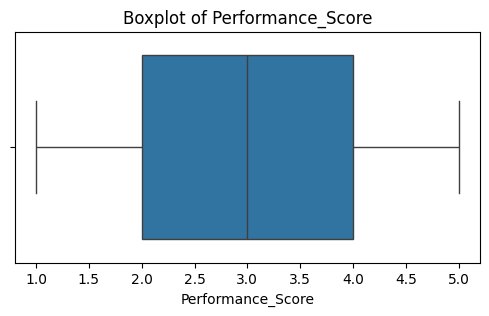

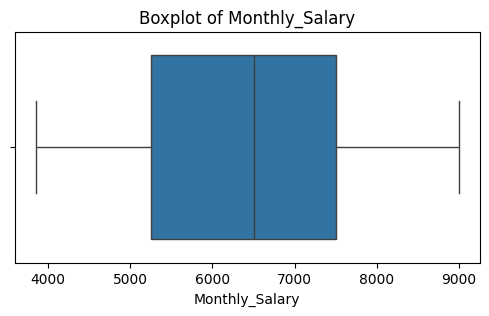

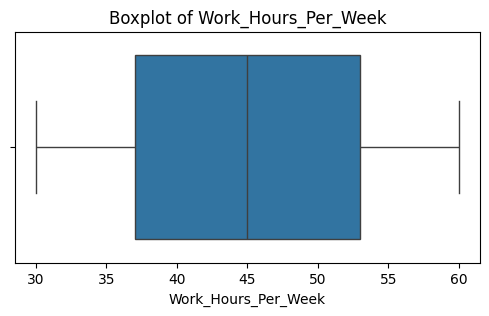

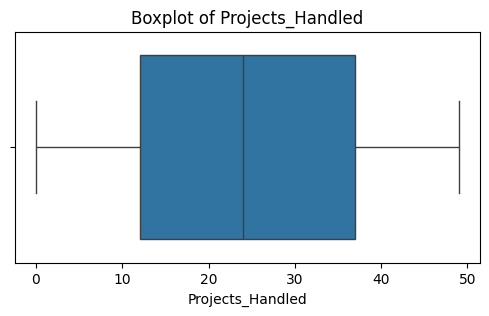

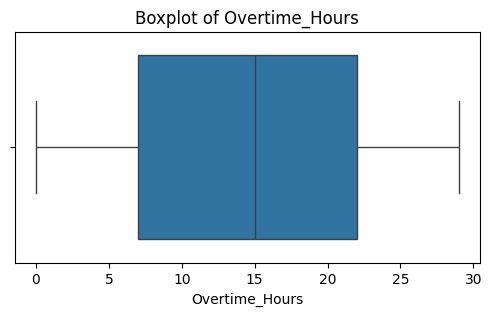

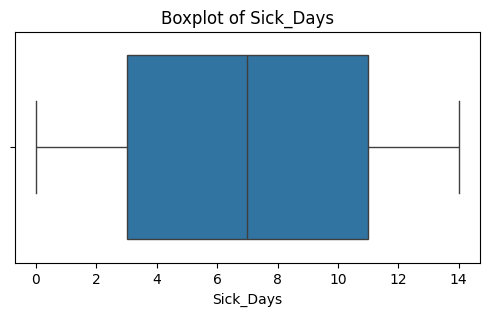

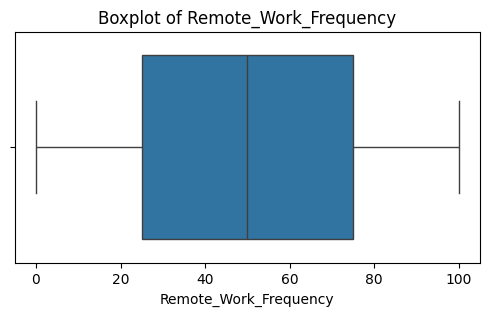

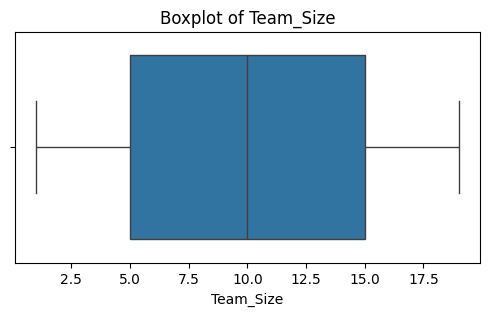

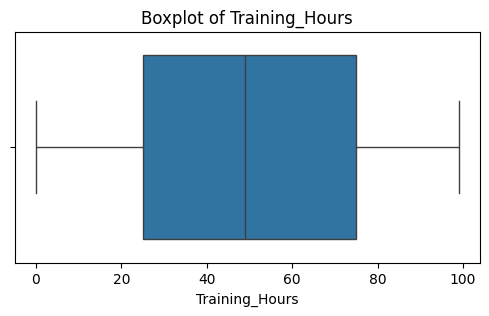

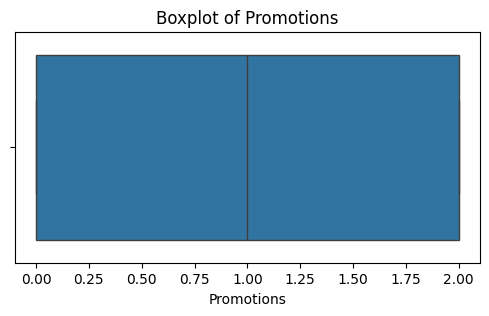

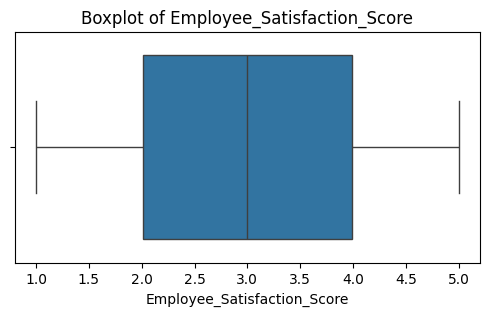

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [13]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
# Define features and target
# Assuming 'Salary' or 'MonthlyIncome' is the target column
target_col = 'Monthly_Salary' # Corrected column name

X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("🔹 Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

🔹 Linear Regression Results:
MSE: 16186.224025736034
R2 Score: 0.991401223111146


In [16]:
print("🔹 Predicted Salaries (Linear Regression):")
print(y_pred_lr)


🔹 Predicted Salaries (Linear Regression):
[7309.38514086 8296.77353879 7798.1358882  ... 7305.64914132 8783.74844245
 4553.14618592]


In [17]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


🔹 Random Forest Results:
MSE: 0.0
R2 Score: 1.0


In [18]:
pip install xgboost


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
xgb.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate
print("\n🔹 XGBoost Regressor Results:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))



🔹 XGBoost Regressor Results:
MSE: 29.659347534179688
R2 Score: 0.9999842643737793


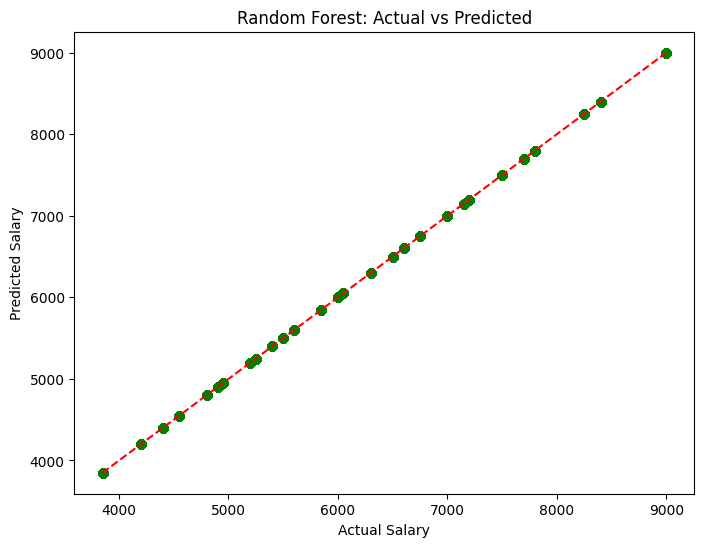

In [20]:
# Actual vs Predicted for Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [21]:
import joblib

joblib.dump(rf, "salary_predictor_rf.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [22]:
!pip install gradio

In [23]:
import gradio as gr
import pandas as pd
import numpy as np

# --- Placeholder Prediction Function ---
# In a real scenario, you would load your trained model here
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# import joblib
#
# model = joblib.load('your_trained_model.pkl') # Assuming you saved your model

def predict_salary(
    Department,
    Gender,
    Age,
    Job_Title,
    Years_At_Company,
    Education_Level,
    Performance_Score,
    Work_Hours_Per_Week,
    Projects_Handled,
    Overtime_Hours,
    Sick_Days,
    Remote_Work_Frequency,
    Team_Size,
    Training_Hours,
    Promotions,
    Employee_Satisfaction_Score,
    Resigned
):
    """
    This is a placeholder function for demonstrating the Gradio interface.
    Replace this with your actual model's prediction logic.
    """
    predicted_salary = 5000  # Base salary

    # Apply some arbitrary rules for mock prediction based on input features
    if Department == "Engineering":
        predicted_salary += 1000
    elif Department == "Finance":
        predicted_salary += 800
    elif Department == "IT":
        predicted_salary += 900
    elif Department == "Sales":
        predicted_salary += 700
    elif Department == "Legal":
        predicted_salary += 750
    elif Department == "HR":
        predicted_salary += 600
    elif Department == "Marketing":
        predicted_salary += 650
    elif Department == "Operations":
        predicted_salary += 550

    predicted_salary += Age * 10
    predicted_salary += Years_At_Company * 50
    predicted_salary += Performance_Score * 100
    predicted_salary += Work_Hours_Per_Week * 5
    predicted_salary += Projects_Handled * 20
    predicted_salary -= Sick_Days * 30 # Sick days might negatively impact salary
    predicted_salary += Promotions * 200
    predicted_salary += Employee_Satisfaction_Score * 50

    if Education_Level == "Bachelor":
        predicted_salary += 300
    elif Education_Level == "Master":
        predicted_salary += 700
    elif Education_Level == "PhD":
        predicted_salary += 1200

    if Job_Title == "Manager":
        predicted_salary += 1500
    elif Job_Title == "Director":
        predicted_salary += 2500
    elif Job_Title == "Specialist":
        predicted_salary += 400
    elif Job_Title == "Engineer":
        predicted_salary += 600
    elif Job_Title == "Developer":
        predicted_salary += 550
    elif Job_Title == "Analyst":
        predicted_salary += 350
    elif Job_Title == "Consultant":
        predicted_salary += 800
    elif Job_Title == "Technician":
        predicted_salary += 300


    if Gender == "Female":
        predicted_salary -= 50 # Example of a slight gender bias in mock data
    if Resigned == "TRUE":
        predicted_salary -= 200 # A penalty for resigned employees in mock data

    return round(predicted_salary, 2)

# --- Gradio Interface Setup ---
inputs = [
    gr.Dropdown(
        ["IT", "Finance", "Customer Support", "Engineering", "Marketing", "Legal", "HR", "Operations", "Sales"],
        label="Department",
        value="IT" # Default value for demonstration
    ),
    gr.Radio(
        ["Male", "Female", "Other"],
        label="Gender",
        value="Male" # Default value for demonstration
    ),
    gr.Slider(minimum=18, maximum=70, step=1, label="Age (Years)", value=30),
    gr.Dropdown(
        ["Specialist", "Developer", "Analyst", "Manager", "Technician", "Engineer", "Consultant"],
        label="Job Title",
        value="Developer" # Default value for demonstration
    ),
    gr.Slider(minimum=0, maximum=40, step=1, label="Years At Company", value=5),
    gr.Dropdown(
        ["High School", "Bachelor", "Master", "PhD"],
        label="Education Level",
        value="Bachelor" # Default value for demonstration
    ),
    gr.Slider(minimum=1.0, maximum=5.0, step=0.1, label="Performance Score", value=3.0),
    gr.Slider(minimum=20, maximum=60, step=1, label="Work Hours Per Week", value=40),
    gr.Slider(minimum=0, maximum=50, step=1, label="Projects Handled", value=10),
    gr.Slider(minimum=0, maximum=30, step=1, label="Overtime Hours", value=2),
    gr.Slider(minimum=0, maximum=30, step=1, label="Sick Days", value=1),
    gr.Slider(minimum=0, maximum=100, step=1, label="Remote Work Frequency (%)", value=50),
    gr.Slider(minimum=1, maximum=20, step=1, label="Team Size", value=5),
    gr.Slider(minimum=0, maximum=100, step=1, label="Training Hours", value=20),
    gr.Slider(minimum=0, maximum=5, step=1, label="Promotions", value=0),
    gr.Slider(minimum=1.0, maximum=5.0, step=0.1, label="Employee Satisfaction Score", value=3.5),
    gr.Radio(
        ["TRUE", "FALSE"],
        label="Resigned (Is the employee resigned?)",
        value="FALSE" # Default value for demonstration
    )
]

output = gr.Number(label="Predicted Monthly Salary")

gr.Interface(
    fn=predict_salary,
    inputs=inputs,
    outputs=output,
    title="Employee Salary Prediction",
    description="Enter employee details to get a predicted monthly salary. Note: This is a mock prediction using placeholder logic. For real predictions, integrate your trained model."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://63620b16fc26444d2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
import gradio as gr
import pandas as pd
import numpy as np

# --- Placeholder Prediction Function (Modified for fewer inputs) ---
# In a real scenario, if your actual model was trained on ALL inputs,
# you would need to decide how to handle the missing inputs (e.g., use default values,
# impute them, or retrain a simpler model).
# For this placeholder, we'll just use the provided fewer inputs.

def predict_salary_simplified(
    Department,
    Gender,
    Age,
    Job_Title,
    Years_At_Company,
    Education_Level,
    Performance_Score
):
    """
    This is a placeholder function for demonstrating a simplified Gradio interface.
    It uses a subset of inputs for a basic mock prediction.
    """
    predicted_salary = 4000  # Base salary, adjusted for fewer factors

    # Apply some arbitrary rules for mock prediction based on selected inputs
    if Department == "Engineering":
        predicted_salary += 1200
    elif Department == "Finance":
        predicted_salary += 900
    elif Department == "IT":
        predicted_salary += 1000
    elif Department == "Sales":
        predicted_salary += 750
    elif Department == "Legal":
        predicted_salary += 800
    elif Department == "HR":
        predicted_salary += 650
    elif Department == "Marketing":
        predicted_salary += 700
    elif Department == "Operations":
        predicted_salary += 600

    predicted_salary += Age * 15 # Age might have a stronger impact with fewer inputs
    predicted_salary += Years_At_Company * 70 # Years_At_Company might have a stronger impact
    predicted_salary += Performance_Score * 150 # Performance_Score might have a stronger impact

    if Education_Level == "Bachelor":
        predicted_salary += 400
    elif Education_Level == "Master":
        predicted_salary += 900
    elif Education_Level == "PhD":
        predicted_salary += 1500

    if Job_Title == "Manager":
        predicted_salary += 1800
    elif Job_Title == "Director":
        predicted_salary += 3000
    elif Job_Title == "Specialist":
        predicted_salary += 500
    elif Job_Title == "Engineer":
        predicted_salary += 700
    elif Job_Title == "Developer":
        predicted_salary += 650
    elif Job_Title == "Analyst":
        predicted_salary += 400
    elif Job_Title == "Consultant":
        predicted_salary += 900
    elif Job_Title == "Technician":
        predicted_salary += 350

    if Gender == "Female":
        predicted_salary -= 70 # Example of a slight gender bias in mock data

    # Ensure salary doesn't go below a reasonable minimum
    predicted_salary = max(predicted_salary, 3500)

    return round(predicted_salary, 2)

# --- Gradio Interface Setup (Modified for fewer inputs) ---
inputs_simplified = [
    gr.Dropdown(
        ["IT", "Finance", "Customer Support", "Engineering", "Marketing", "Legal", "HR", "Operations", "Sales"],
        label="Department",
        value="Engineering"
    ),
    gr.Radio(
        ["Male", "Female", "Other"],
        label="Gender",
        value="Male"
    ),
    gr.Slider(minimum=18, maximum=70, step=1, label="Age (Years)", value=35),
    gr.Dropdown(
        ["Specialist", "Developer", "Analyst", "Manager", "Technician", "Engineer", "Consultant", "Director"],
        label="Job Title",
        value="Engineer"
    ),
    gr.Slider(minimum=0, maximum=40, step=1, label="Years At Company", value=8),
    gr.Dropdown(
        ["High School", "Bachelor", "Master", "PhD"],
        label="Education Level",
        value="Master"
    ),
    gr.Slider(minimum=1.0, maximum=5.0, step=0.1, label="Performance Score", value=4.0),
]

output_simplified = gr.Number(label="Predicted Monthly Salary")

gr.Interface(
    fn=predict_salary_simplified,
    inputs=inputs_simplified,
    outputs=output_simplified,
    title="Employee Salary Prediction (Simplified Inputs)",
    description="Enter key employee details to get a predicted monthly salary. Note: This is a mock prediction using placeholder logic and a reduced set of features."
).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://17bf3402f13ebbaa52.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
